In [1]:
#Import packages

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20,5)
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
from datetime import datetime

In [2]:
#import dataframes

df1_gen = pd.read_csv('Plant_1_Generation_Data.csv', header=0)
df1_sensor = pd.read_csv('Plant_1_Weather_Sensor_Data.csv', header = 0)
df2_gen = pd.read_csv('Plant_2_Generation_Data.csv', header=0)
df2_sensor = pd.read_csv('Plant_2_Weather_Sensor_Data.csv', header = 0)

# EDA

In [3]:
#DataSet of Generation data plant_1
df1_gen.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [4]:
#DataSet of Sensor data plant_1
df1_sensor.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [5]:
#DataSet of Generation data plant_2
df2_gen.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [6]:
#DataSet of Sensor data plant_2
df2_sensor.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


## Shape and data types
## Defined exploration for each data frame

In [7]:
##Plant 1 Generation
print("Plant_1 Generation: ")
print(df1_gen.shape)
print(df1_gen.dtypes)

##Plant 1 Sensor
print("Plant_1 Sensor: ")
print(df1_sensor.shape)
print(df1_sensor.dtypes)


##Plant 2 Generation
print("Plant_2 Generation: ")
print(df2_gen.shape)
print(df2_gen.dtypes)


##Plant 2 Sensor
print("Plant_2 Sensor: ")
print(df2_sensor.shape)
print(df2_sensor.dtypes)

Plant_1 Generation: 
(68778, 7)
DATE_TIME       object
PLANT_ID         int64
SOURCE_KEY      object
DC_POWER       float64
AC_POWER       float64
DAILY_YIELD    float64
TOTAL_YIELD    float64
dtype: object
Plant_1 Sensor: 
(3182, 6)
DATE_TIME               object
PLANT_ID                 int64
SOURCE_KEY              object
AMBIENT_TEMPERATURE    float64
MODULE_TEMPERATURE     float64
IRRADIATION            float64
dtype: object
Plant_2 Generation: 
(67698, 7)
DATE_TIME       object
PLANT_ID         int64
SOURCE_KEY      object
DC_POWER       float64
AC_POWER       float64
DAILY_YIELD    float64
TOTAL_YIELD    float64
dtype: object
Plant_2 Sensor: 
(3259, 6)
DATE_TIME               object
PLANT_ID                 int64
SOURCE_KEY              object
AMBIENT_TEMPERATURE    float64
MODULE_TEMPERATURE     float64
IRRADIATION            float64
dtype: object


In [8]:
#Defined exploration for each data frame

def df_explore(df, df_name):
    print(f"First five rows of {df_name}:\n{df.head()}\n")
    print(f"Columns in {df_name}:\n{df.columns}\n")
    print(f"The dataframe contains {df.shape[0]} rows and {df.shape[1]} columns.\n")
    print(f"Summary of {df_name}:\n{df.describe()}\n")
    print(f"Discription data of {df_name}:\n{df.describe(exclude='number')}\n")

In [9]:
print('Plant 1 Generation')
df_explore(df1_gen,'Plant_1 Generation')
print('Plant 1 Sensor')
df_explore(df1_sensor, 'Plant_1 Sensor')

print('Plant 2 Generation')
df_explore(df2_gen,'Plant_2 Generation')
print('Plant 2 Sensor')
df_explore(df2_sensor, 'Plant_2 Sensor')

Plant 1 Generation
First five rows of Plant_1 Generation:
          DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0  

Columns in Plant_1 Generation:
Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD'],
      dtype='object')

The dataframe contains 68778 rows and 7 columns.

Summary of Plant_1 Generation:
        PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    68778.0  68778.

In [10]:
print('No. of unique values: Plant 1 Generation')
df1_gen.nunique()

No. of unique values: Plant 1 Generation


DATE_TIME       3158
PLANT_ID           1
SOURCE_KEY        22
DC_POWER       32909
AC_POWER       32686
DAILY_YIELD    29900
TOTAL_YIELD    37267
dtype: int64

In [11]:
print('No. of unique values: Plant 1 Sensor')
df1_sensor.nunique()

No. of unique values: Plant 1 Sensor


DATE_TIME              3182
PLANT_ID                  1
SOURCE_KEY                1
AMBIENT_TEMPERATURE    3182
MODULE_TEMPERATURE     3182
IRRADIATION            1758
dtype: int64

In [12]:
print('No. of unique values: Plant 2 Generation')
df2_gen.nunique()

No. of unique values: Plant 2 Generation


DATE_TIME       3259
PLANT_ID           1
SOURCE_KEY        22
DC_POWER       30743
AC_POWER       30721
DAILY_YIELD    30345
TOTAL_YIELD    33114
dtype: int64

In [13]:
print('No. of unique values: Plant 2 Sensor')
df2_sensor.nunique()

No. of unique values: Plant 2 Sensor


DATE_TIME              3259
PLANT_ID                  1
SOURCE_KEY                1
AMBIENT_TEMPERATURE    3259
MODULE_TEMPERATURE     3259
IRRADIATION            1863
dtype: int64

In [14]:
print("Is there a null value in Plant_1 Generation data? {}".format(df1_gen.isnull().sum().any()))
print("Is there a null value in Plant_1 Sensor data? {}".format(df1_sensor.isnull().sum().any()))
print("Is there a null value in Plant_2 Generation data? {}".format(df2_gen.isnull().sum().any()))
print("Is there a null value in Plant_2 Sensor data? {}".format(df2_sensor.isnull().sum().any()))

Is there a null value in Plant_1 Generation data? False
Is there a null value in Plant_1 Sensor data? False
Is there a null value in Plant_2 Generation data? False
Is there a null value in Plant_2 Sensor data? False


# Box plots to review outliers

Plant_1 Generation


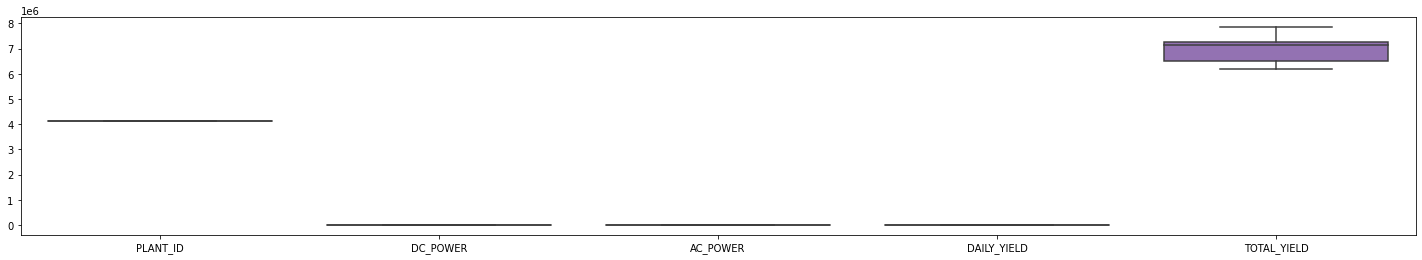

Plant_1 Sensor


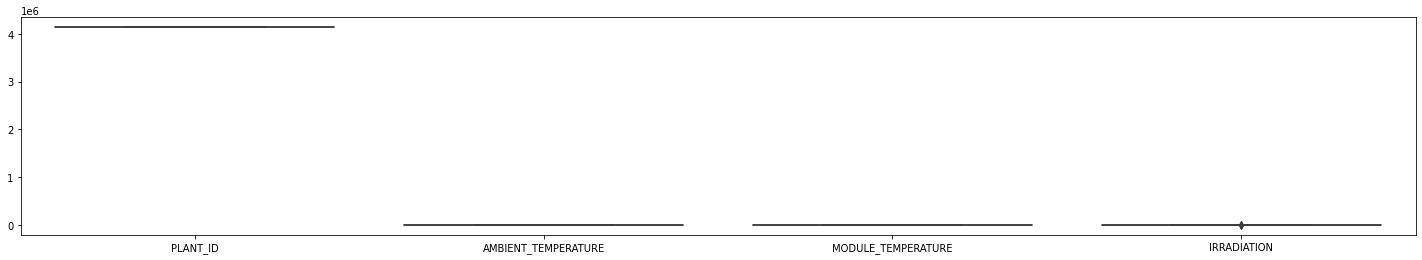

Plant_2 Generation


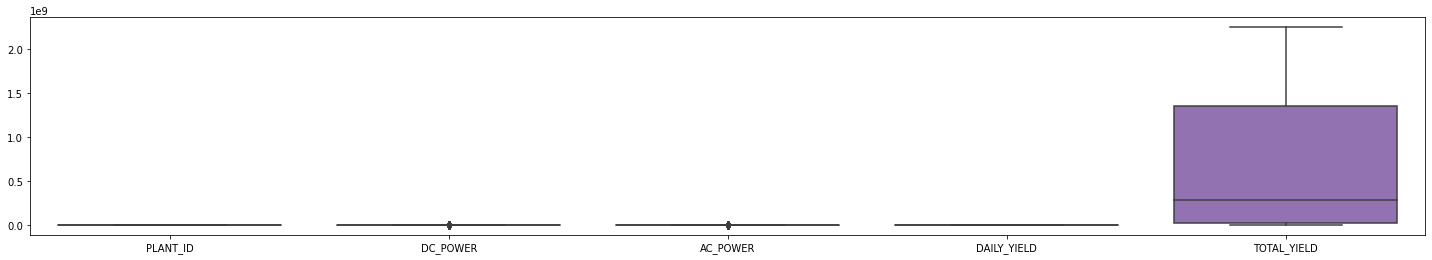

Plant_2 Sensor


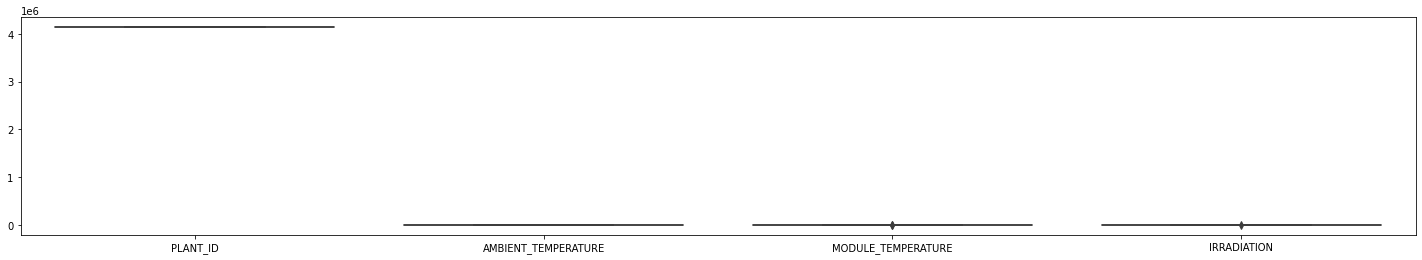

In [15]:
print("Plant_1 Generation")
plt.figure(figsize=(25,4))
sns.boxplot(data= df1_gen)
plt.show()

print("Plant_1 Sensor")
plt.figure(figsize=(25,4))
sns.boxplot(data= df1_sensor)
plt.show()

print("Plant_2 Generation")
plt.figure(figsize=(25,4))
sns.boxplot(data= df2_gen)
plt.show()

print("Plant_2 Sensor")
plt.figure(figsize=(25,4))
sns.boxplot(data= df2_sensor)
plt.show()

## Insights

Columns in Plant Generation Datasets:

'DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER','DAILY_YIELD', 'TOTAL_YIELD'

Columns in Plant Sensor datasets:

'DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION'

Plant 1 Plant1_gen contains 68778 rows and 7 columns. Plant1_sensor contains 3182 rows and 6 columns. No. of inverter present (Source Key): 22 No. of Null values: None

   DC_POWER          AC_POWER         AMBIENT_TEMPERATURE         MODULE_TEMPERATURE
Max 14471.12 1410.95 35.25 65.54 Min 0.00 0.00 20.39 18.14

    DC_POWER       AC_POWER      DAILY_YIELD     TOTAL_YIELD
Mean 3147.426211 307.802752 3295.968737 6.978712e+06

Plant2_gen Plant2_gen contains 67698 rows and 7 columns. Plant2_sensor contains 3259 rows and 6 columns. No. of inverter prsent (Source Key): 22 No. of Null values: None

    DC_POWER          AC_POWER         AMBIENT_TEMPERATURE         MODULE_TEMPERATURE
Max 1420.93 1385.42 39.18 66.63 Min 0.00 0.00 20.94 20.26

    DC_POWER       AC_POWER      DAILY_YIELD     TOTAL_YIELD
Mean 246.701961 241.277825 3294.890295 6.589448e+

## Correlation
Both plants have very similar results.

- DC power shows a near perfect positive correlation with AC power. Which means that both plants convert most of the energy recieved.Inverter converts DC power to AC power.

- DAILY_YIELD and TOTAL_YIELD are directly connected with the results of AC/DC power.We can see that DC and AC power both contribute to instances of DAILY_YIELD as well as TOTAL_YIELD.

- Increasing ambient temperature is strongly correlated with increasing module temperature and increasing irradiation levels. Increasing module temperature is also very strongly correlated with increasing irradiation levels in both plants.

- This showse that increasing energy recieved from the sun has the effect of increasing module temperature as well as the surrounding air (ambient) temperature. Higher levels of energy from the sun causes increase in temperatures.

- The correlation between ambient temperatures and module temperatures are fairly positively correlated to each other up to a certain point, then the module temperature begin to decrease marginally as ambient temperature continues to increase. It is very small variation that could could be meaningless or could be indicative of a possible temperature regulation system in place that keeps the module from rising above a certain level.

- The ambient temperature is not in a controlled environment and thus will continue to gain heat as the amount of energy obtained from the sun increases. The module temperature shifts that energy away that regulates its moment-to-moment temperature.

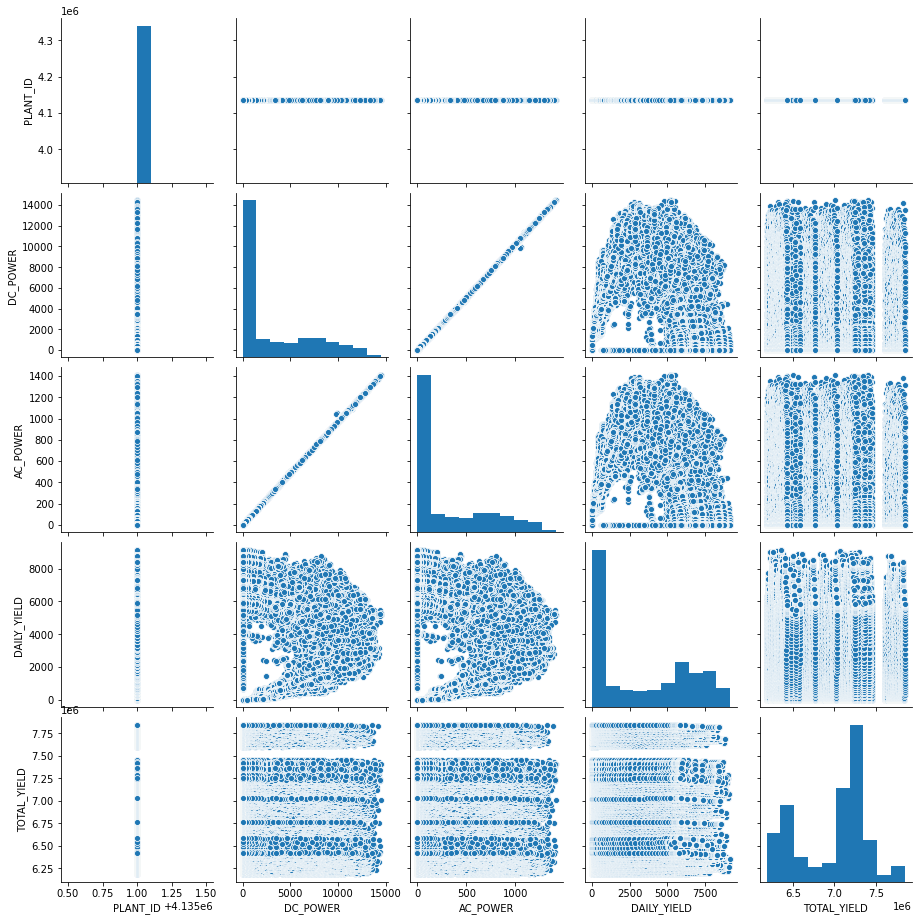

In [16]:
sns.pairplot(df1_gen)
plt.show()

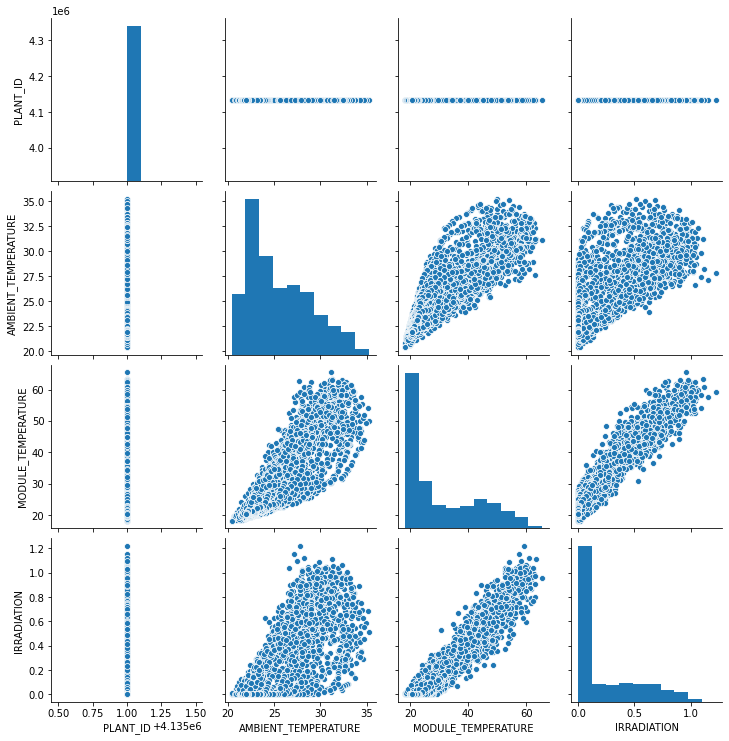

In [17]:
sns.pairplot(df1_sensor)
plt.show()

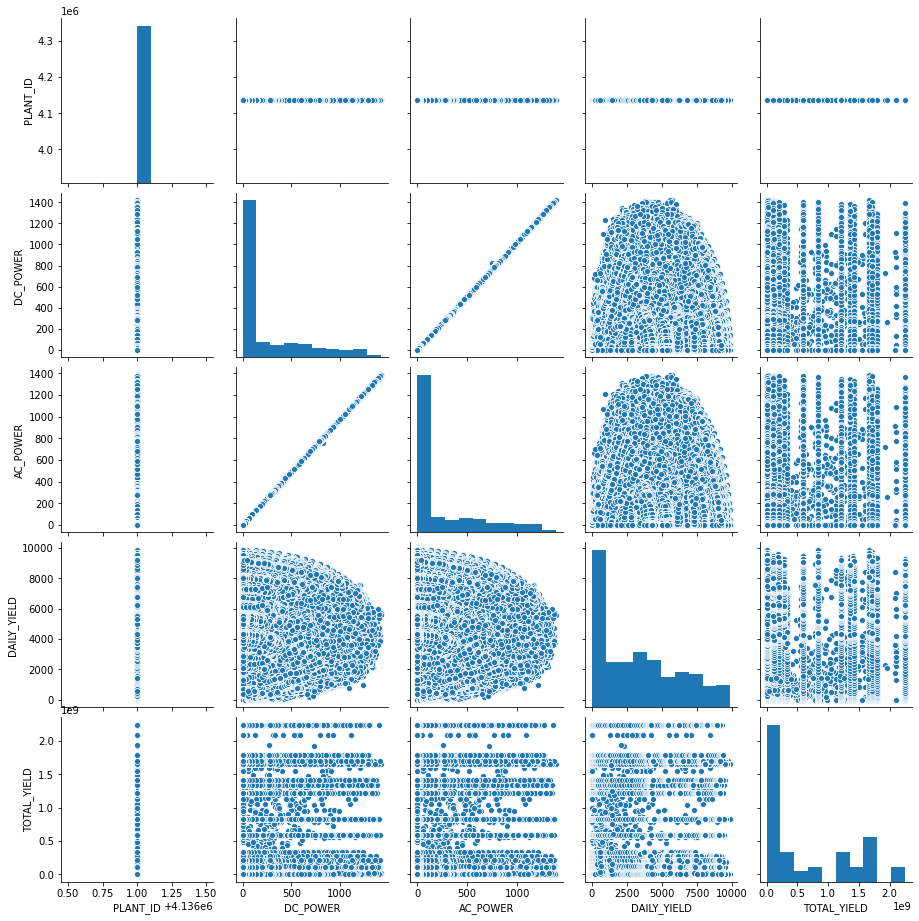

In [18]:
sns.pairplot(df2_gen)
plt.show()

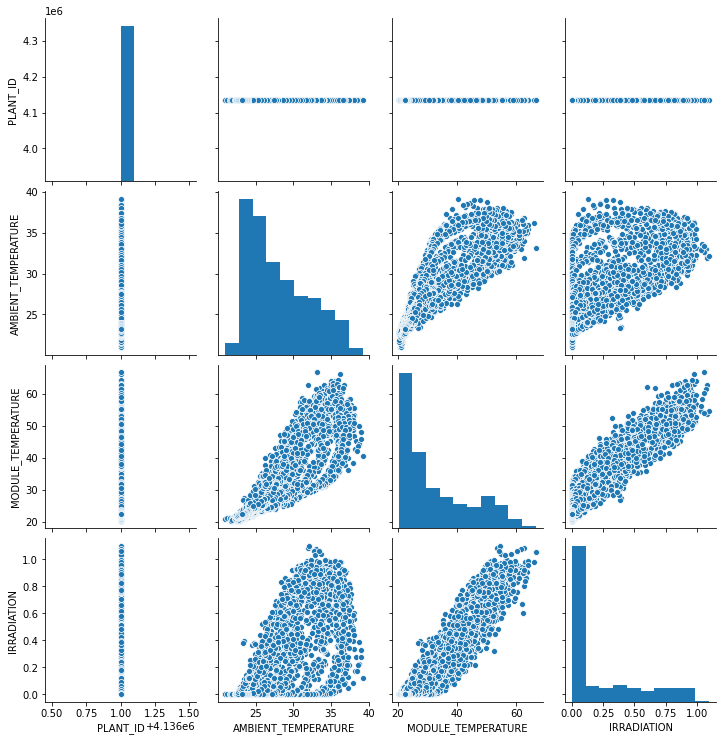

In [19]:
sns.pairplot(df2_sensor)
plt.show()

# Date_Time variable is of object time, convert to datetime type.

In [20]:
df1_gen['DATE'] = [datetime.strftime(i,format="%d-%m-%Y") for i in pd.to_datetime(df1_gen.DATE_TIME)]
df1_sensor['DATE'] = [datetime.strftime(i,format="%d-%m-%Y") for i in pd.to_datetime(df1_sensor.DATE_TIME)]
df2_gen['DATE'] = [datetime.strftime(i,format="%d-%m-%Y") for i in pd.to_datetime(df2_gen.DATE_TIME)]
df2_sensor['DATE'] = [datetime.strftime(i,format="%d-%m-%Y") for i in pd.to_datetime(df2_sensor.DATE_TIME)]

# Comparing two plants

#From the plots above we see distinct peaks in power output, daily yield, irradiation and temperature, changing the sun each day.
#In the comparisons between plant 1 and plant 2, that total_yield for plant 1 is constant while for plant 2, it varies dramatically with several interludes where it falls to zero and rises again.
#However, Daily weather trends appear similar between plant 1 and plant 2.

- The levels of IRRADIATION between the two plants are very similar.
- AMBIENT_TEMPERATURE and MODULE_TEMPERATURE varies between plant 1 and plant 2
- Plant 2 has a warmer AMBIENT_TEMPERATURE and MODULE_TEMPERATURE than average

#The reason behnd the fluctuations in TOTAL_YIELD in plant 2 could be these occasional days where ambient temperature and the higher average module temperature rises. Perhaps the equipment is over-heating causing it to be less efficient or fail when its preferred operational temperature is exceeded?

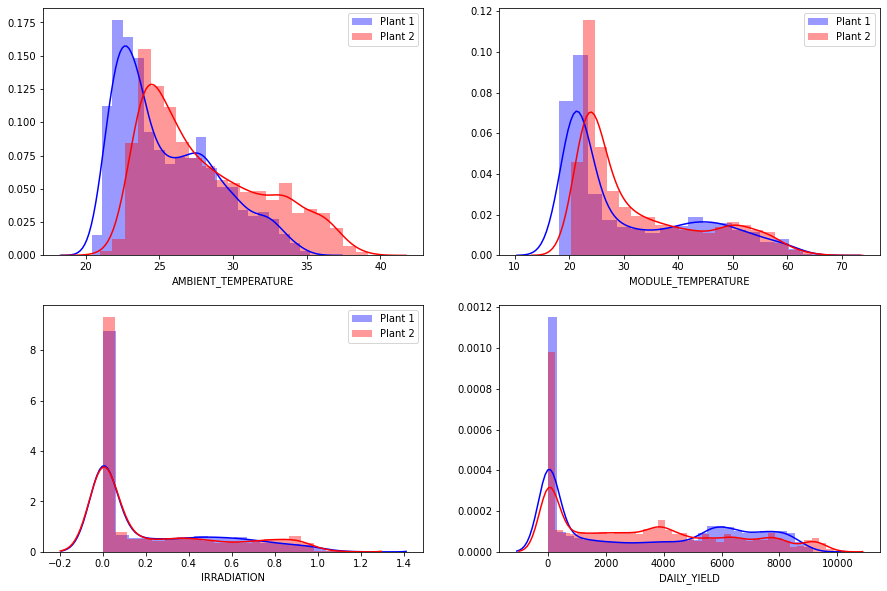

In [23]:
#Temperatures, Irradiations and Daily Yield

from scipy import stats
from matplotlib.offsetbox import AnchoredText

plt.figure(figsize=(15,10))

plt.subplot(2,2,1,)
ax1 = sns.distplot(df1_sensor['AMBIENT_TEMPERATURE'], color = 'b', label = 'Plant 1')
ax1 = sns.distplot(df2_sensor['AMBIENT_TEMPERATURE'], color = 'r', label = 'Plant 2',)
ax1.legend()

plt.subplot(2,2,2,)
ax2 = sns.distplot(df1_sensor['MODULE_TEMPERATURE'], color = 'b', label = 'Plant 1')
ax2 = sns.distplot(df2_sensor['MODULE_TEMPERATURE'], color = 'r', label = 'Plant 2')
ax2.legend()

plt.subplot(2,2,3,)
ax2 = sns.distplot(df1_sensor['IRRADIATION'], color = 'b', label = 'Plant 1')
ax2 = sns.distplot(df2_sensor['IRRADIATION'], color = 'r', label = 'Plant 2')
ax2.legend()

plt.subplot(2,2,4,)
ax2 = sns.distplot(df1_gen['DAILY_YIELD'], color = 'b', label = 'Plant 1')
ax2 = sns.distplot(df2_gen['DAILY_YIELD'], color = 'r', label = 'Plant 2')

# Temperature 

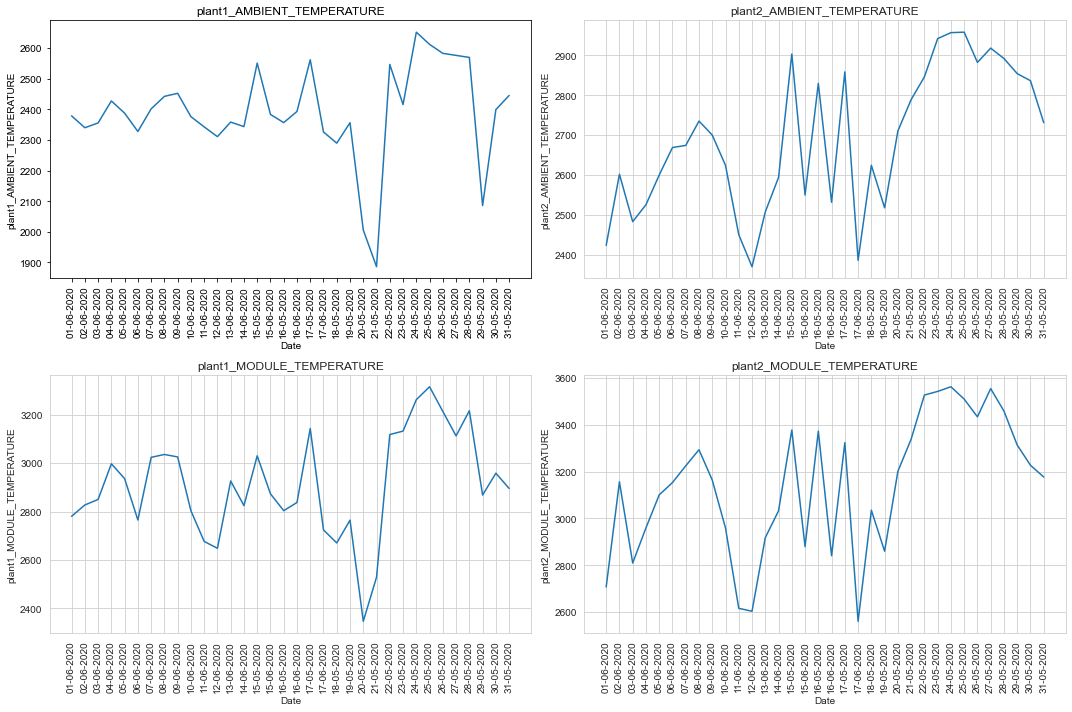

In [24]:
#Temperature check

#group by DAY
plant1_AMBIENT_TEMPERATURE = df1_sensor.groupby(['DATE']).AMBIENT_TEMPERATURE.sum()
plant1_MODULE_TEMPERATURE = df1_sensor.groupby(['DATE']).MODULE_TEMPERATURE.sum()
plant2_AMBIENT_TEMPERATURE = df2_sensor.groupby(['DATE']).AMBIENT_TEMPERATURE.sum()
plant2_MODULE_TEMPERATURE = df2_sensor.groupby(['DATE']).MODULE_TEMPERATURE.sum()
#create dataframe
Temperature = pd.DataFrame({'Date':plant2_AMBIENT_TEMPERATURE.index,'plant1_AMBIENT_TEMPERATURE':plant1_AMBIENT_TEMPERATURE.values,'plant1_MODULE_TEMPERATURE':plant1_MODULE_TEMPERATURE.values,'plant2_AMBIENT_TEMPERATURE':plant2_AMBIENT_TEMPERATURE.values,'plant2_MODULE_TEMPERATURE':plant2_MODULE_TEMPERATURE.values})


plt.figure(figsize=(15,10))

plt.subplot(2,2,1,)
sns.set_style('whitegrid')
fig=sns.lineplot(data=Temperature,x='Date',y='plant1_AMBIENT_TEMPERATURE',ci=None)
plt.xticks(rotation=90)
fig.set_title('plant1_AMBIENT_TEMPERATURE')

plt.subplot(2,2,2,)
sns.set_style('whitegrid')
fig=sns.lineplot(data=Temperature,x='Date',y='plant2_AMBIENT_TEMPERATURE',ci=None)
plt.xticks(rotation=90)
fig.set_title('plant2_AMBIENT_TEMPERATURE')

plt.subplot(2,2,3,)
sns.set_style('whitegrid')
fig=sns.lineplot(data=Temperature,x='Date',y='plant1_MODULE_TEMPERATURE',ci=None)
plt.xticks(rotation=90)
fig.set_title('plant1_MODULE_TEMPERATURE')

plt.subplot(2,2,4,)
sns.set_style('whitegrid')
fig=sns.lineplot(data=Temperature,x='Date',y='plant2_MODULE_TEMPERATURE',ci=None)
plt.xticks(rotation=90)
fig.set_title('plant2_MODULE_TEMPERATURE')


plt.tight_layout()

# Inverters

#Plant 2 inveters converts more power than Plant 1.
#5 inverters in Plant 2 have generated very less power compare to the rest. Which means that they might need a repair/replacement.
#Inverters generating less power in plant 1 are not very less.
Althoughaverage daily yield in Plant 1 is higher than that of plant 2.


For the potentially subperforming inverters, we can also exclude that their blackouts may be due to higher temperature, so they maybe have only to be replaced or fixed.


(0.0, 10000000.0)

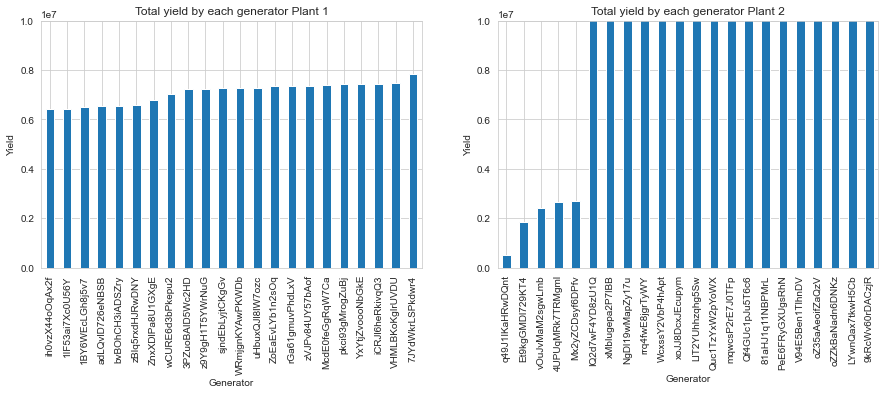

In [25]:
plt.figure(figsize=(15,10))


plt.subplot(2,2,1,)

(df1_gen.groupby('SOURCE_KEY')['TOTAL_YIELD'].max()).sort_values().plot(kind = 'bar', figsize = (15,10))
plt.ylabel('Yield')
plt.xlabel('Generator')
plt.title('Total yield by each generator Plant 1')
plt.ylim((0,10000000))

plt.subplot(2,2,2,)
(df2_gen.groupby('SOURCE_KEY')['TOTAL_YIELD'].max()).sort_values().plot(kind = 'bar', figsize = (15,10))
plt.ylabel('Yield')
plt.xlabel('Generator')
plt.title('Total yield by each generator Plant 2')
plt.ylim((0,10000000))

In [26]:
print((df1_gen.groupby('SOURCE_KEY')['TOTAL_YIELD'].max()).min)

<bound method Series.min of SOURCE_KEY
1BY6WEcLGh8j5v7    6485319.0
1IF53ai7Xc0U56Y    6433566.0
3PZuoBAID5Wc2HD    7237425.0
7JYdWkrLSPkdwr4    7846821.0
McdE0feGgRqW7Ca    7408587.0
VHMLBKoKgIrUVDU    7456208.0
WRmjgnKYAwPKWDb    7273532.0
YxYtjZvoooNbGkE    7425442.0
ZnxXDlPa8U1GXgE    6770737.0
ZoEaEvLYb1n2sOq    7341753.0
adLQvlD726eNBSB    6524508.0
bvBOhCH3iADSZry    6539009.0
iCRJl6heRkivqQ3    7426263.0
ih0vzX44oOqAx2f    6426129.0
pkci93gMrogZuBj    7415430.0
rGa61gmuvPhdLxV    7356897.0
sjndEbLyjtCKgGv    7261681.0
uHbuxQJl8lW7ozc    7287002.0
wCURE6d3bPkepu2    7028601.0
z9Y9gH1T5YWrNuG    7251204.0
zBIq5rxdHJRwDNY    6583369.0
zVJPv84UY57bAof    7363272.0
Name: TOTAL_YIELD, dtype: float64>


# Daily Yield

Mean: Plant1 6667356.994292486
      Plant2 6560514.211855301

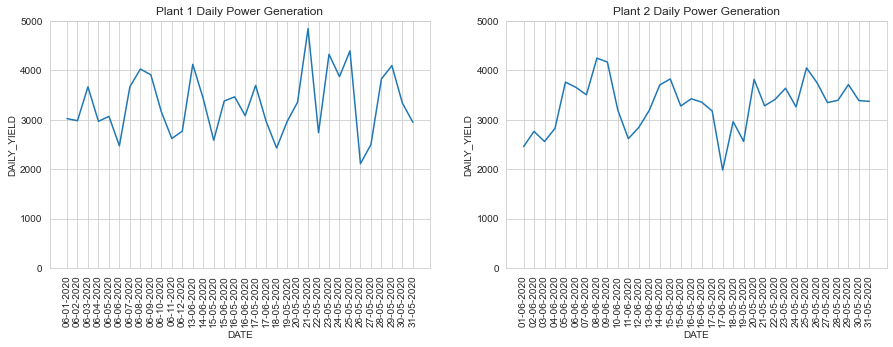

In [27]:
df1_gen['DATE'] = pd.to_datetime(df1_gen['DATE_TIME'])
df1_gen['DATE'] = [datetime.strftime(i,format="%d-%m-%Y") for i in pd.to_datetime(df1_gen.DATE_TIME)]
df2_gen['DATE'] = pd.to_datetime(df2_gen['DATE_TIME'])
df2_gen['DATE'] = [datetime.strftime(i,format="%d-%m-%Y") for i in pd.to_datetime(df2_gen.DATE_TIME)]

plt.figure(figsize=(15,10))
plt.subplot(2,2,1,)
sns.set_style('whitegrid')
fig=sns.lineplot(data=df1_gen,x='DATE',y='DAILY_YIELD',ci=None)
plt.xticks(rotation=90)
plt.ylim((0,5000))
fig.set_title('Plant 1 Daily Power Generation')

plt.subplot(2,2,2,)
sns.set_style('whitegrid')
fig=sns.lineplot(data=df2_gen,x='DATE',y='DAILY_YIELD',ci=None)
plt.xticks(rotation=90)
plt.ylim((0,5000))
fig.set_title('Plant 2 Daily Power Generation')
plt.show()

In [28]:
plant1_dailyyield_mean = df1_gen.groupby(['DATE']).DAILY_YIELD.sum().mean() 
plant2_dailyyield_mean = df2_gen.groupby(['DATE']).DAILY_YIELD.sum().mean()

print(plant1_dailyyield_mean, plant2_dailyyield_mean)

6667356.994292486 6560514.211855301


# Plant 1

# Heatmap

- Change datetime format

In [29]:
df1_gen['DATE'] = [datetime.strftime(i,format="(%Y%m%d %H:%M)")for i in pd.to_datetime(df1_gen.DATE_TIME)]
df1_sensor['DATE'] = [datetime.strftime(i,format="(%Y%m%d %H:%M)")for i in pd.to_datetime(df1_sensor.DATE_TIME)]

In [30]:
df1_sensor.drop(['DATE_TIME'], axis = 1)

,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE
0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,(20200515 00:00)
1,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0,(20200515 00:15)
2,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0,(20200515 00:30)
3,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0,(20200515 00:45)
4,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0,(20200515 01:00)
...,...,...,...,...,...,...
3177,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0,(20200617 22:45)
3178,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0,(20200617 23:00)
3179,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0,(20200617 23:15)
3180,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0,(20200617 23:30)


In [31]:
df1_gen.drop(['DATE_TIME'], axis = 1)

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE
0,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,(20200515 00:00)
1,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,(20200515 00:00)
2,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,(20200515 00:00)
3,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,(20200515 00:00)
4,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,(20200515 00:00)
...,...,...,...,...,...,...,...
68773,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,(20200617 23:45)
68774,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,(20200617 23:45)
68775,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,(20200617 23:45)
68776,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,(20200617 23:45)


In [32]:
power_plant1 = df1_sensor.merge(df1_gen, left_on='DATE', right_on='DATE')

In [33]:
power_plant1.head()

,DATE_TIME_x,PLANT_ID_x,SOURCE_KEY_x,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,DATE_TIME_y,PLANT_ID_y,SOURCE_KEY_y,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,(20200515 00:00),15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,(20200515 00:00),15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,(20200515 00:00),15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,(20200515 00:00),15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,(20200515 00:00),15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


<AxesSubplot:>

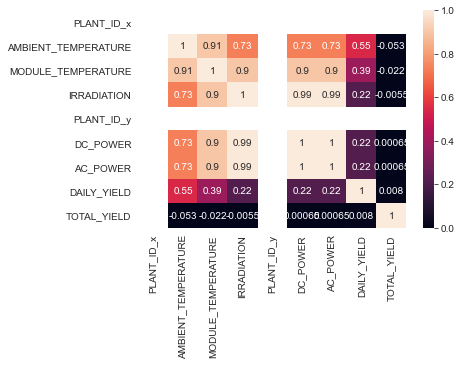

In [34]:
corr=power_plant1.corr(method='spearman')
sns.heatmap(corr, robust=True, annot=True, vmin=0, vmax=1)

In [35]:
powerplant1_drop = power_plant1.drop(['PLANT_ID_x','PLANT_ID_y'], axis=1)

In [36]:
powerplant1_drop.head()

,DATE_TIME_x,SOURCE_KEY_x,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,DATE_TIME_y,SOURCE_KEY_y,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,(20200515 00:00),15-05-2020 00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15 00:00:00,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,(20200515 00:00),15-05-2020 00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15 00:00:00,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,(20200515 00:00),15-05-2020 00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15 00:00:00,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,(20200515 00:00),15-05-2020 00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15 00:00:00,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,(20200515 00:00),15-05-2020 00:00,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


<AxesSubplot:>

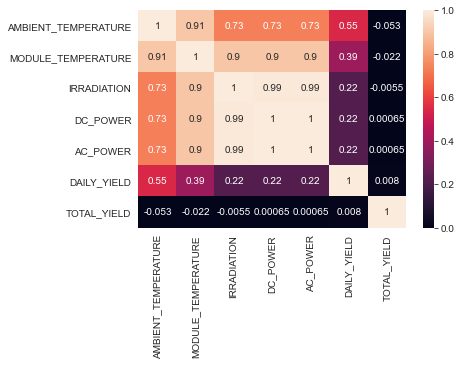

In [37]:
corr=powerplant1_drop.corr(method='spearman')
sns.heatmap(corr, robust=True, annot=True, vmin=0, vmax=1)

# OLS model

In [38]:
import statsmodels.api as sm
filt = ['DC_POWER', 'AC_POWER','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']

Y = powerplant1_drop['DAILY_YIELD']
X = powerplant1_drop[filt]
X = sm.add_constant(X)
model1_1 = sm.OLS(Y,X)
results1_1 = model1_1.fit()
results1_1.params
results1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DAILY_YIELD   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     6137.
Date:                Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:46:08   Log-Likelihood:            -4.2113e+05
No. Observations:               45680   AIC:                         8.423e+05
Df Residuals:                   45674   BIC:                         8.423e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.627e+04    115.237   -141.198      0.000   -1.65e+04    -1.6e+04
DC_POWER               26.3281      0.988     26.656      0.000      24.392      28.264
AC_POWER             -269.2540     10.087    -26.692      0.000    -289.025    -249.482
AMBIENT_TEMPERATURE   915.7386      8.453    108.334      0.000     899.171     932.306
MODULE_TEMPERATURE   -110.1241      6.072    -18.135      0.000    -122.026     -98.222
IRRADIATION         -2663.7782    332.677     -8.007      0.000   -3315.830   -2011.726
==============================================================================
Omnibus:                     3053.416   Durbin-Watson:                   0.213
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3697.224
Skew:                           0.684   Prob(JB):                         0.00
Kurtosis:                       3.269   Cond. No.                     1.52e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
import statsmodels.api as sm
#filt_1 = ['DC_POWER', 'AC_POWER','AMBIENT_TEMPERATURE','IRRADIATION','DAILY_YIELD']
filt_1 = ['DC_POWER', 'AC_POWER','AMBIENT_TEMPERATURE','IRRADIATION','MODULE_TEMPERATURE']
Y = powerplant1_drop['DAILY_YIELD']
X = powerplant1_drop[filt_1]
X = sm.add_constant(X)
model1_2 = sm.OLS(Y,X)
results1_2 = model1_2.fit()
results1_2.params
results1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DAILY_YIELD   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     6137.
Date:                Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:46:08   Log-Likelihood:            -4.2113e+05
No. Observations:               45680   AIC:                         8.423e+05
Df Residuals:                   45674   BIC:                         8.423e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.627e+04    115.237   -141.198      0.000   -1.65e+04    -1.6e+04
DC_POWER               26.3281      0.988     26.656      0.000      24.392      28.264
AC_POWER             -269.2540     10.087    -26.692      0.000    -289.025    -249.482
AMBIENT_TEMPERATURE   915.7386      8.453    108.334      0.000     899.171     932.306
IRRADIATION         -2663.7782    332.677     -8.007      0.000   -3315.830   -2011.726
MODULE_TEMPERATURE   -110.1241      6.072    -18.135      0.000    -122.026     -98.222
==============================================================================
Omnibus:                     3053.416   Durbin-Watson:                   0.213
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3697.224
Skew:                           0.684   Prob(JB):                         0.00
Kurtosis:                       3.269   Cond. No.                     1.52e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Plant 2

In [40]:
power_plant2 = df2_sensor.merge(df2_gen, left_on='DATE_TIME', right_on='DATE_TIME')
power_plant2

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE_x,PLANT_ID_y,SOURCE_KEY_y,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_y
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,15-05-2020,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,15-05-2020
1,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,15-05-2020,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,15-05-2020
2,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,15-05-2020,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,15-05-2020
3,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,15-05-2020,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,15-05-2020
4,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,15-05-2020,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,15-05-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0,17-06-2020,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05,17-06-2020
67694,2020-06-17 23:45:00,4136001,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0,17-06-2020,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08,17-06-2020
67695,2020-06-17 23:45:00,4136001,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0,17-06-2020,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06,17-06-2020
67696,2020-06-17 23:45:00,4136001,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0,17-06-2020,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08,17-06-2020


- Heatmap

<AxesSubplot:>

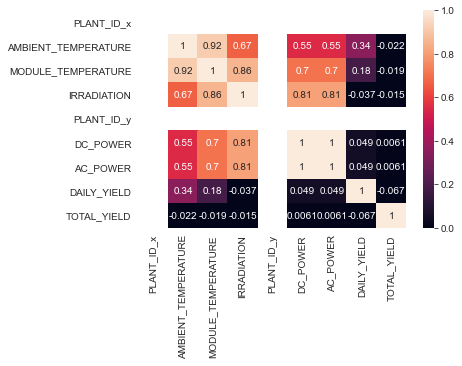

In [41]:
corr=power_plant2.corr(method='spearman')
sns.heatmap(corr, robust=True, annot=True, vmin=0, vmax=1)


In [50]:
powerplant2_drop = power_plant2.drop(['PLANT_ID_x',"PLANT_ID_y", 'DATE_TIME','SOURCE_KEY_x','DATE_x','SOURCE_KEY_y', 'DATE_y','TOTAL_YIELD'], axis=1)
power_plant2.drop([],inplace=True, axis=0)
powerplant2_drop.head()

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER,DAILY_YIELD
0,27.004764,25.060789,0.0,0.0,0.0,9425.000000
1,27.004764,25.060789,0.0,0.0,0.0,0.000000
2,27.004764,25.060789,0.0,0.0,0.0,3075.333333
3,27.004764,25.060789,0.0,0.0,0.0,269.933333
4,27.004764,25.060789,0.0,0.0,0.0,3177.000000


<AxesSubplot:>

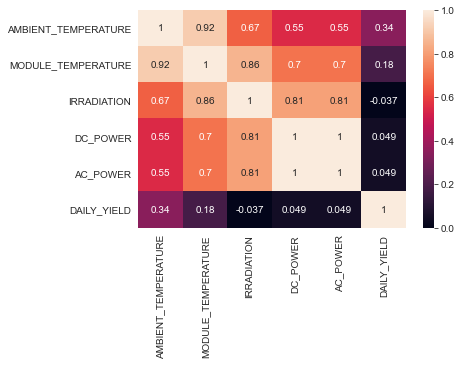

In [51]:
corr=powerplant2_drop.corr(method='spearman')
sns.heatmap(corr, robust=True, annot=True, vmin=0, vmax=1)

In [52]:
import statsmodels.api as sm
#filt = ['DC_POWER', 'AC_POWER','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']
filt = ['DC_POWER', 'AC_POWER','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']

Y = powerplant2_drop['DAILY_YIELD']
X = powerplant2_drop[filt]
X = sm.add_constant(X)
model2_1 = sm.OLS(Y,X)
results2_1 = model2_1.fit()
results2_1.params
results2_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DAILY_YIELD   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     6514.
Date:                Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:53:34   Log-Likelihood:            -6.2293e+05
No. Observations:               67698   AIC:                         1.246e+06
Df Residuals:                   67692   BIC:                         1.246e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.025e+04     83.985   -122.073      0.000   -1.04e+04   -1.01e+04
DC_POWER              426.3619      9.695     43.979      0.000     407.360     445.363
AC_POWER             -434.9498      9.919    -43.851      0.000    -454.391    -415.509
AMBIENT_TEMPERATURE   581.4011      6.960     83.530      0.000     567.759     595.043
MODULE_TEMPERATURE    -51.1701      5.724     -8.939      0.000     -62.390     -39.950
IRRADIATION         -5656.0196    153.917    -36.747      0.000   -5957.696   -5354.343
==============================================================================
Omnibus:                     1308.049   Durbin-Watson:                   1.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1219.776
Skew:                           0.287   Prob(JB):                    1.35e-265
Kurtosis:                       2.680   Cond. No.                     1.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

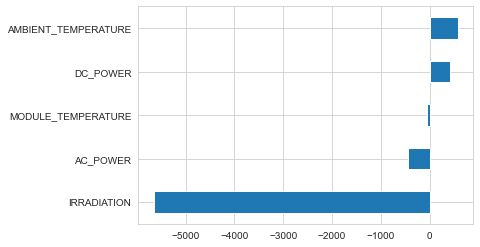

In [53]:
results2_1.params[1:].sort_values().plot(kind='barh')

Text(0.5, 1.0, 'Partial Regression Plots')

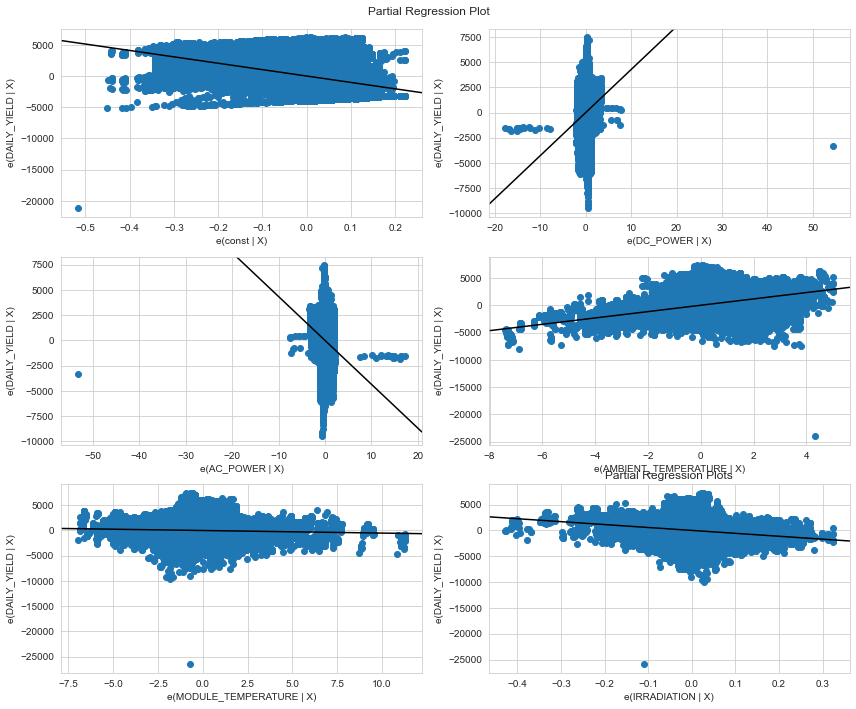

In [54]:
# Your code
import statsmodels.graphics.regressionplots as sm
fig = plt.figure(figsize=(12,10))
fig = sm.plot_partregress_grid(results2_1, fig=fig)
plt.title('Partial Regression Plots')

- Daily Yield

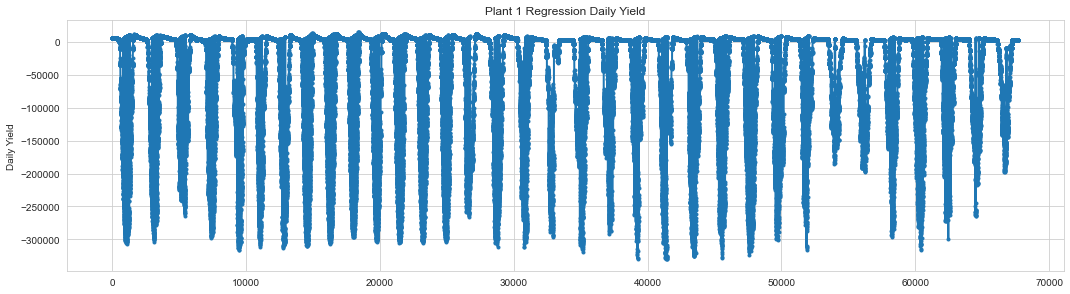

In [55]:
mpl.rcParams['figure.figsize'] = (15,4)

DailyYield=powerplant1_drop['DAILY_YIELD']
ax=results1_1.predict(X).plot(linewidth=2,marker='.')
ax.set_ylabel('Daily Yield')

plt.tight_layout()
plt.title('Plant 1 Regression Daily Yield')
plt.show()

# - Plant 2

- Daily Yield

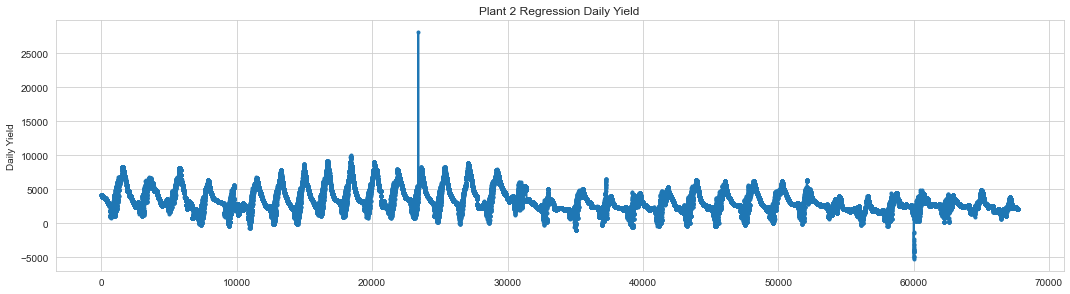

In [56]:
mpl.rcParams['figure.figsize'] = (15,4)

DailyYield=powerplant2_drop['DAILY_YIELD']
ax=results2_1.predict(X).plot(linewidth=2,marker='.')
ax.set_ylabel('Daily Yield')

plt.tight_layout()
plt.title('Plant 2 Regression Daily Yield')
plt.show()